## Homework 9  



Name: Dan Jang

Comments for instructor:


## Exercise 8.5 The driven pendulum: Second order ODE

A pendulum like the one in Exercise 8.4 can be driven by, for example, exerting a small oscillating force horizontally on the mass.  Then the equation of motion for the pendulum becomes

\begin{equation*}
{d^2\theta\over d t^2} = - {g\over\ell}\sin\theta
  + C \cos\theta \sin\Omega t,
\end{equation*}

where $C$ and $\Omega$ are constants.

**a)** 
Write a program to solve this equation for $\theta$ as a function of time with $\ell=10\,$cm, $C=2\,\mathrm{s}^{-2}$ and $\Omega=5\,\mathrm{s}^{-1}$ and make a plot of $\theta$ as a function of time from $t=0$ to $t=100\,$s.  Start the pendulum at rest with $\theta=0$ and $d\theta/ d t=0$.

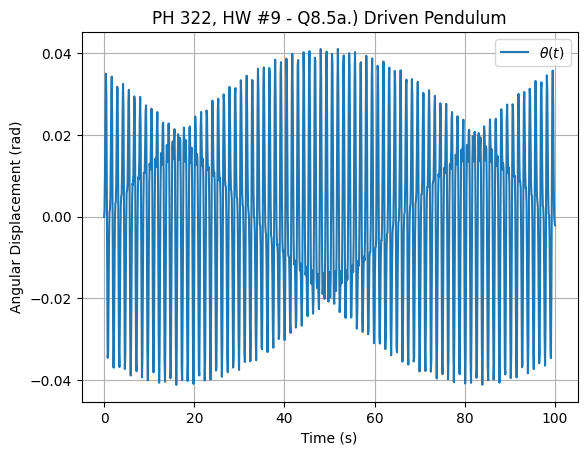

In [9]:
### PH322 - HW #9 - Q8.5a. - Dan Jang
## Credits to ChatGPT for numpy, scipy, & matplotlib implementation

import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Constants
g = 9.81  # m/s^2
l = 0.1  # 10 cm = 0.1 m
C = 2.0  # s^-2
Omega = 5.0  # s^-1

# Initial conditions
theta0 = 0.0
omega0 = 0.0
y0 = [theta0, omega0]

# Time array
t = np.linspace(0, 100, 1000)


# Define the system of ODEs
def pendulum(y, t, g, l, C, Omega):
    theta, omega = y
    dydt = [
        omega, -g / l * np.sin(theta) + C * np.cos(theta) * np.sin(Omega * t)
    ]
    return dydt


# Solve the ODEs
sol = odeint(pendulum, y0, t, args=(g, l, C, Omega))

# Plot the solution
plt.plot(t, sol[:, 0], label=r'$\theta(t)$')
plt.xlabel('Time (s)')
plt.ylabel('Angular Displacement (rad)')
plt.title('PH 322, HW #9 - Q8.5a.) Driven Pendulum')
plt.legend()
plt.grid()
plt.show()

**Pts /10**

**b)** 
Now change the value of $\Omega$, while keeping $C$ the same, to find a value for which the pendulum resonates with the driving force and swings widely from side to side.  Make a plot for this case also.

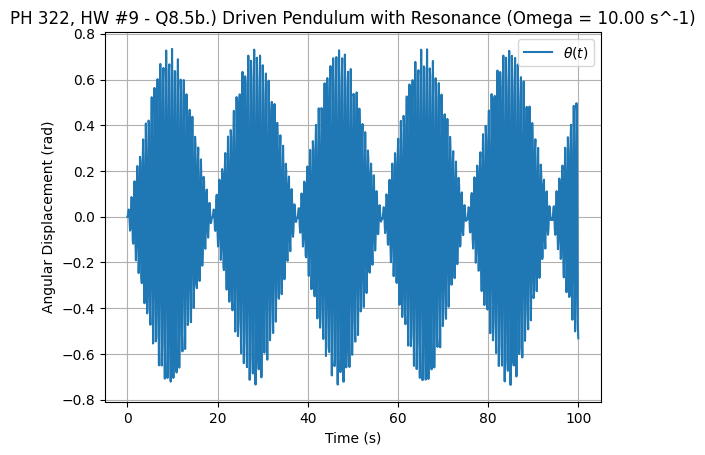

In [10]:
### PH322 - HW #9 - Q8.5b. - Dan Jang
## Credits to ChatGPT for numpy, scipy, & matplotlib implementation

import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Constants
g = 9.81  # m/s^2
l = 0.1  # 10 cm = 0.1 m
C = 2.0  # s^-2
Omega = 5.0  # s^-1

# Initial conditions
theta0 = 0.0
omega0 = 0.0
y0 = [theta0, omega0]

# Time array
t = np.linspace(0, 100, 1000)


# Define the system of ODEs
def pendulum(y, t, g, l, C, Omega):
    theta, omega = y
    dydt = [
        omega, -g / l * np.sin(theta) + C * np.cos(theta) * np.sin(Omega * t)
    ]
    return dydt


# Function to calculate the final value of theta for a given Omega value
def final_theta(Omega):
    sol = odeint(pendulum, y0, t, args=(g, l, C, Omega))
    return sol[-1, 0]


# Find the resonant frequency
Omega_values = np.linspace(0, 10, 100)
final_theta_values = [final_theta(Omega) for Omega in Omega_values]
Omega_resonant = Omega_values[np.argmax(np.abs(final_theta_values))]

# Solve the ODEs for the resonant frequency
sol_resonant = odeint(pendulum, y0, t, args=(g, l, C, Omega_resonant))

# Plot the solution for the resonant frequency
plt.plot(t, sol_resonant[:, 0], label=r'$\theta(t)$')
plt.xlabel('Time (s)')
plt.ylabel('Angular Displacement (rad)')
plt.title(
    f'PH 322, HW #9 - Q8.5b.) Driven Pendulum with Resonance (Omega = {Omega_resonant:.2f} s^-1)'
)
plt.legend()
plt.grid()
plt.show()

# # Solve the ODEs
# sol = odeint(pendulum, y0, t, args=(g, l, C, Omega))

# # Plot the solution
# plt.plot(t, sol[:, 0], label=r'$\theta(t)$')
# plt.xlabel('Time (s)')
# plt.ylabel('Angular Displacement (rad)')
# plt.title('PH 322, HW #9 - Q8.5a.) Driven Pendulum')
# plt.legend()
# plt.grid()
# plt.show()

**Value of $\Omega$:** 10.00 s^-1

**Pts /5**

**Extra Credit** Create animations of the motion of the pendulum using Vpython, one when the driving frequency is far from resonance as in part a, and one when it is near resonance as in part b. 

In [6]:
### PH322 - HW #9 - Q8.5. X-tra C-redit - Dan Jang
## Credits to ChatGPT for vpython, numpy, & scipy implementation

from vpython import sphere, cylinder, vector, rate, canvas
import numpy as np
from scipy.integrate import odeint

# Constants
g = 9.81  # m/s^2
l = 0.1  # 10 cm = 0.1 m
C = 2.0  # s^-2
Omega = 5.0  # s^-1

# Initial conditions
theta0 = 0.0
omega0 = 0.0
y0 = [theta0, omega0]

# Time array
t = np.linspace(0, 100, 1000)


# Define the system of ODEs
def pendulum(y, t, g, l, C, Omega):
    theta, omega = y
    dydt = [
        omega, -g / l * np.sin(theta) + C * np.cos(theta) * np.sin(Omega * t)
    ]
    return dydt

# Solve the ODEs
sol = odeint(pendulum, y0, t, args=(g, l, C, Omega))

# Function to create the animation
def animate_pendulum(sol, title):
    # Create the VPython scene
    scene = canvas(title=title)

    # Pendulum components
    pivot = sphere(pos=vector(0, 0, 0), radius=0.05, color=vector(1, 1, 1))
    bob = sphere(pos=vector(l * np.sin(sol[0, 0]), -l * np.cos(sol[0, 0]), 0),
                 radius=0.1,
                 color=vector(0, 0, 1))
    rod = cylinder(pos=pivot.pos,
                   axis=bob.pos - pivot.pos,
                   radius=0.01,
                   color=vector(1, 0.5, 0))

    # Animate the pendulum motion
    for theta in sol[:, 0]:
        rate(100)  # Frame rate
        bob.pos = vector(l * np.sin(theta), -l * np.cos(theta), 0)
        rod.axis = bob.pos - pivot.pos


# Animate the pendulum motion for the original Omega value
animate_pendulum(sol, title=f'PH322 - HW #9 - Q8.5 XC: Driven Pendulum (Omega = {Omega} s^-1)')

# Animate the pendulum motion for the resonant Omega value
animate_pendulum(
    sol_resonant,
    title=f'Driven Pendulum with Resonance (Omega = {Omega_resonant:.2f} s^-1)'
)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

KeyboardInterrupt: 

**XC Pts /5**

**Total Exercise Pts /15**

## Exercise 8.10 Cometary orbits: Adaptive step size

Many comets travel in highly elongated orbits around the Sun.  For much of their lives they are far out in the solar system, moving very slowly, but on rare occasions their orbit brings them close to the Sun for a fly-by and for a brief period of time they move very fast indeed (check your textbook for a diagram).

This is a classic example of a system for which an adaptive step size method is useful, because for the large periods of time when the comet is moving slowly we can use long time-steps, so that the program runs quickly, but short time-steps are crucial in the brief but fast-moving period close to the Sun.

The differential equation obeyed by a comet is straightforward to derive.  The force between the Sun, with mass $M$ at the origin, and a comet of mass $m$ with position vector $\vec{r}$ is $GMm/r^2$ in direction $-\vec{r}/r$ (i.e., the direction towards the Sun), and hence Newton's second law tells us that

\begin{equation*}
m {d^2\vec{r}\over d t^2} = -\biggl({GMm\over r^2}\biggr)\,{\vec{r}\over r}.
\end{equation*}

Canceling the $m$ and taking the $x$ component we have

\begin{equation*}
{d^2 x\over d t^2} = -GM {x\over r^3}\,,
\end{equation*}

and similarly for the other two coordinates.  We can, however, throw out one of the coordinates because the comet stays in a single plane as it orbits.  If we orient our axes so that this plane is perpendicular to the $z$-axis, we can forget about the $z$ coordinate and we are left with just two second-order equations to solve:

\begin{equation*}
{d^2 x\over d t^2} = -GM {x\over r^3}\,, \qquad
{d^2 y\over d t^2} = -GM {y\over r^3}\,,
\end{equation*}

where $r=\sqrt{x^2+y^2}$.

**a)** 
Turn these two second-order equations into four first-order equations, using the methods you have learned.

Firstly, to convert the 2nd-Order Equations into 1st-Order ones, let us introduce two variables for the velocities, as follows.

Let $v_x = \frac{dx}{dt}$ & let $v_y = \frac{dy}{dt}$, where we can begin our conversions as such,
\begin{align*}
\frac{dx}{dt} &= v_x, \\
\frac{dy}{dt} &= v_y.
\end{align*}

Then, we re-write the 2nd-Order Equations in the terms of the new velocities variables as follows,
\begin{align*}
\frac{dv_x}{dt} &= -GM \frac{x}{r^3}, \\
\frac{dv_y}{dt} &= -GM \frac{y}{r^3}.
\end{align*}

Therefore, we get four 1st-Order Equations,
\begin{align*}
\frac{dx}{dt} &= v_x, \\
\frac{dy}{dt} &= v_y, \\
\frac{dv_x}{dt} &= -GM \frac{x}{r^3}, \\
\frac{dv_y}{dt} &= -GM \frac{y}{r^3}.
\end{align*}

**Pts /5**

**b)** 
Write a program to solve your equations using the fourth-order Runge--Kutta method with a _fixed_ step size.  You will need to look up the mass of the Sun and Newton's gravitational constant $G$.  As an initial condition, take a comet at coordinates $x=4$ billion kilometers and $y=0$ (which is somewhere out around the orbit of Neptune) with initial velocity $v_x=0$ and $v_y = 500\,\mathrm{m\,s}^{-1}$.  Make a graph showing the trajectory of the comet (i.e., a plot of $y$ against $x$).

Choose a fixed step size $h$ that allows you to accurately calculate at least two full orbits of the comet.  Since orbits are periodic, a good indicator of an accurate calculation is that successive orbits of the comet lie on top of one another on your plot.  If they do not then you need a smaller value of $h$. 

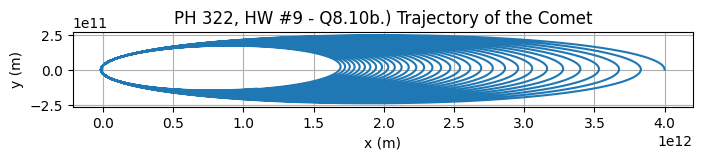

In [20]:
### PH322 - HW #9 - Q8.10b. - Dan Jang
## Credits to ChatGPT for numpy & matplotlib implementation

import numpy as np
import matplotlib.pyplot as plt

# Constants
G = 6.67430e-11  # m^3 kg^-1 s^-2, gravitational constant
M = 1.989e30  # kg, mass of the Sun
x0 = 4e12  # m, initial x-position
y0 = 0  # m, initial y-position
vx0 = 0  # m/s, initial x-velocity
vy0 = 500  # m/s, initial y-velocity


# Functions for the first-order equations
def f_x(vx):
    return vx


def f_y(vy):
    return vy


def f_vx(x, y):
    r = np.sqrt(x**2 + y**2)
    return -G * M * x / r**3


def f_vy(x, y):
    r = np.sqrt(x**2 + y**2)
    return -G * M * y / r**3


# Fourth-order Runge-Kutta method
def runge_kutta(x, y, vx, vy, h):
    k1_x = h * f_x(vx)
    k1_y = h * f_y(vy)
    k1_vx = h * f_vx(x, y)
    k1_vy = h * f_vy(x, y)

    k2_x = h * f_x(vx + 0.5 * k1_vx)
    k2_y = h * f_y(vy + 0.5 * k1_vy)
    k2_vx = h * f_vx(x + 0.5 * k1_x, y + 0.5 * k1_y)
    k2_vy = h * f_vy(x + 0.5 * k1_x, y + 0.5 * k1_y)

    k3_x = h * f_x(vx + 0.5 * k2_vx)
    k3_y = h * f_y(vy + 0.5 * k2_vy)
    k3_vx = h * f_vx(x + 0.5 * k2_x, y + 0.5 * k2_y)
    k3_vy = h * f_vy(x + 0.5 * k2_x, y + 0.5 * k2_y)

    k4_x = h * f_x(vx + k3_vx)
    k4_y = h * f_y(vy + k3_vy)
    k4_vx = h * f_vx(x + k3_x, y + k3_y)
    k4_vy = h * f_vy(x + k3_x, y + k3_y)

    x_new = x + (k1_x + 2 * k2_x + 2 * k3_x + k4_x) / 6
    y_new = y + (k1_y + 2 * k2_y + 2 * k3_y + k4_y) / 6
    vx_new = vx + (k1_vx + 2 * k2_vx + 2 * k3_vx + k4_vx) / 6
    vy_new = vy + (k1_vy + 2 * k2_vy + 2 * k3_vy + k4_vy) / 6

    return x_new, y_new, vx_new, vy_new


# Simulation
h = 50000  # s, time step
n_steps = 500000  # number of steps
x, y, vx, vy = x0, y0, vx0, vy0
x_vals = [x]
y_vals = [y]

for _ in range(n_steps):
    x, y, vx, vy = runge_kutta(x, y, vx, vy, h)
    x_vals.append(x)
    y_vals.append(y)

# Plot
plt.figure(figsize=(8, 8))
plt.plot(x_vals, y_vals)
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.title("PH 322, HW #9 - Q8.10b.) Trajectory of the Comet")
plt.grid()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

**Give a short description of your findings. What value of $h$ did you use?  What did you observe in your simulation? How long did the calculation take?**

It looks like we see a very elliptical orbit, which appears to be most likely nominal (at least from a visual, graphical glance) for a comet orbiting around a planet's outer area.

A value of $h = 5000$ seconds was used.

The calculation took about 14.7 seconds.

**Pts /10**

**c)**
Make a copy of your program and modify the copy to do the calculation using an adaptive step size.  Set a target accuracy of
$\delta=1$ kilometer per year in the position of the comet and again plot the trajectory.  

In [1]:
### PH322 - HW #9 - Q8.10c. - Dan Jang
## Credits to ChatGPT for numpy & matplotlib implementation

import numpy as np
import matplotlib.pyplot as plt

# Constants
G = 6.67430e-11  # m^3 kg^-1 s^-2, gravitational constant
M = 1.989e30  # kg, mass of the Sun
x0 = 4e12  # m, initial x-position
y0 = 0  # m, initial y-position
vx0 = 0  # m/s, initial x-velocity
vy0 = 500  # m/s, initial y-velocity
accuracy = 1e3 / 365 / 24 / 3600  # m/s, target accuracy of 1 km/year


# Functions for the first-order equations
def f_x(vx):
    return vx


def f_y(vy):
    return vy


def f_vx(x, y):
    r = np.sqrt(x**2 + y**2)
    return -G * M * x / r**3


def f_vy(x, y):
    r = np.sqrt(x**2 + y**2)
    return -G * M * y / r**3


# Runge-Kutta-Fehlberg method
def runge_kutta_fehlberg(x, y, vx, vy, h):
    # Coefficients for the fifth-order method
    c = [0, 1 / 4, 3 / 8, 12 / 13, 1, 1 / 2]
    a = [[], [1 / 4], [3 / 32, 9 / 32],
         [1932 / 2197, -7200 / 2197, 7296 / 2197],
         [439 / 216, -8, 3680 / 513, -845 / 4104],
         [-8 / 27, 2, -3544 / 2565, 1859 / 4104, -11 / 40]]
    b1 = [16 / 135, 0, 6656 / 12825, 28561 / 56430, -9 / 50, 2 / 55]
    b2 = [25 / 216, 0, 1408 / 2565, 2197 / 4104, -1 / 5, 0]

    k = np.zeros((6, 4))

    for i in range(6):
        x_temp = x + h * sum(a[i][j] * k[j][0] for j in range(i))
        y_temp = y + h * sum(a[i][j] * k[j][1] for j in range(i))
        vx_temp = vx + h * sum(a[i][j] * k[j][2] for j in range(i))
        vy_temp = vy + h * sum(a[i][j] * k[j][3] for j in range(i))

        k[i] = [
            f_x(vx_temp),
            f_y(vy_temp),
            f_vx(x_temp, y_temp),
            f_vy(x_temp, y_temp)
        ]

    x_new = x + h * sum(b1[i] * k[i][0] for i in range(6))
    y_new = y + h * sum(b1[i] * k[i][1] for i in range(6))
    vx_new = vx + h * sum(b1[i] * k[i][2] for i in range(6))
    vy_new = vy + h * sum(b1[i] * k[i][3] for i in range(6))

    return x_new, y_new, vx_new, vy_new, k


# Simulation
h = 50000  # s, initial time step
x, y, vx, vy = x0, y0, vx0, vy0
x_vals = [x]
y_vals = [y]

while True:
    x_new, y_new, vx_new, vy_new, k = runge_kutta_fehlberg(x, y, vx, vy, h)
    error = np.sqrt((h * sum(
        (k[i][0] - k[i][1]) for i in range(6)))**2 + (h * sum(
            (k[i][2] - k[i][3]) for i in range(6)))**2)

    if error < accuracy:
        x, y, vx, vy = x_new, y_new, vx_new, vy_new
        x_vals.append(x)
        y_vals.append(y)

        if error < accuracy / 32:
            h *= 2

    else:
        h *= 0.9 * (accuracy / error)**0.25

    if vx * x > 0 and vy * y > 0:
        break

# Plot
plt.figure(figsize=(8, 8))
plt.plot(x_vals, y_vals)
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.title(
    "PH 322, HW #9 - Q8.10b.) Trajectory of the Comet with Adaptive Step Size")
plt.grid()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

KeyboardInterrupt: 

**What do you see?  How do the speed, accuracy, and step size of the calculation compare with those in part (b)?**

**Pts /10**

**Extra credit**
Modify your program to place dots on your graph showing the position of the comet at each Runge--Kutta step around a single orbit.  You should see the steps getting closer together when the comet is close to the Sun and further apart when it is far out in the solar system.

In [19]:
### PH322 - HW #9 - Q8.10. X-tra C-redit - Dan Jang
## Credits to ChatGPT for numpy & matplotlib implementation

import numpy as np
import matplotlib.pyplot as plt

# Constants
G = 6.67430e-11  # m^3 kg^-1 s^-2, gravitational constant
M = 1.989e30  # kg, mass of the Sun
x0 = 4e12  # m, initial x-position
y0 = 0  # m, initial y-position
vx0 = 0  # m/s, initial x-velocity
vy0 = 500  # m/s, initial y-velocity
delta = 1e3 / 365.25 / 24 / 3600  # m/s, target accuracy


# Functions for the first-order equations
def f_x(vx):
    return vx


def f_y(vy):
    return vy


def f_vx(x, y):
    r = np.sqrt(x**2 + y**2)
    return -G * M * x / r**3


def f_vy(x, y):
    r = np.sqrt(x**2 + y**2)
    return -G * M * y / r**3


# Fourth-order Runge-Kutta method with adaptive step size
def runge_kutta_adaptive(x, y, vx, vy, h):
    while True:
        # Calculate with the current step size
        x1, y1, vx1, vy1 = runge_kutta(x, y, vx, vy, h)

        # Calculate with half the step size, twice
        x_half, y_half, vx_half, vy_half = runge_kutta(x, y, vx, vy, h / 2)
        x2, y2, vx2, vy2 = runge_kutta(x_half, y_half, vx_half, vy_half, h / 2)

        # Calculate the error
        error = np.sqrt((x1 - x2)**2 + (y1 - y2)**2)

        # If the error is within the target accuracy, accept the step
        if error <= delta:
            return x2, y2, vx2, vy2, h

        # Otherwise, adjust the step size
        h *= 0.9 * np.sqrt(delta / error)


# Simulation
h = 50000  # s, initial time step
x, y, vx, vy = x0, y0, vx0, vy0
x_vals = [x]
y_vals = [y]
h_vals = [h]

while x > 0 or vx < 0:
    x, y, vx, vy, h = runge_kutta_adaptive(x, y, vx, vy, h)
    x_vals.append(x)
    y_vals.append(y)
    h_vals.append(h)

# Plot
plt.figure(figsize=(8, 8))
plt.plot(x_vals, y_vals)
plt.scatter(x_vals,
            y_vals,
            c=h_vals,
            cmap='viridis',
            s=10,
            marker='o',
            alpha=0.5)
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.title(
    "PH 322, HW #9 - Q8.10. XC: Trajectory of the Comet (Adaptive Step Size /w Dotted Steps)"
)
plt.grid()
plt.gca().set_aspect('equal', adjustable='box')
plt.colorbar(label='Step size (s)')
plt.show()

KeyboardInterrupt: 

**XC Pts /5**

**Total Exercise Pts /25**

## Exercise 9.3 Electronic capacitor - Gauss-Seidel with overrelaxation

Consider the following simple model of an electronic capacitor,
consisting of two flat metal plates enclosed in a square metal box:

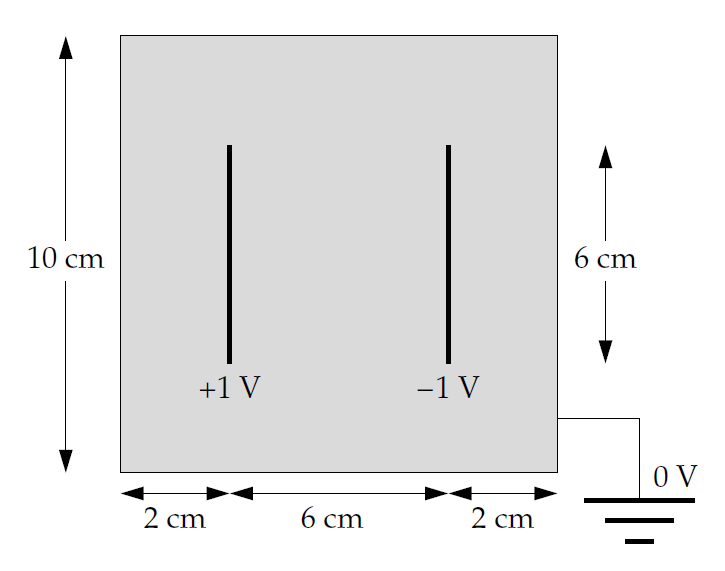

For simplicity let us model the system in two dimensions.  Using **Gauss-Seidel with overrelaxation**, write a program to calculate the electrostatic
potential in the box on a grid of $100\times100$ points, where the walls of
the box are at voltage zero and the two plates (which are of negligible
thickness) are at voltages $\pm1\,$V as shown.  Have your program calculate
the value of the potential at each grid point to a precision of
$10^{-6}\,$volts and then make a density plot of the result. Include a colorbar that shows the scale. 

Hint: Notice that the capacitor plates are at fixed *voltage*, not
fixed charge, so this problem differs from examples we did in class.  In effect, the capacitor plates are part of the boundary
condition in this case: they behave the same way as the walls of the box,
with potentials that are fixed at a certain value and cannot change.

In [10]:
### PH322 - HW #9 - Q9.3. - Dan Jang
## Credits to ChatGPT for numpy & matplotlib implementation



**Total Exercise Pts /10**

## Exercise 9.4 Thermal diffusion in the Earth's crust : FTCS method

A classic example of a diffusion problem with a time-varying boundary condition is the diffusion of heat into the crust of the Earth, as surface temperature varies with the seasons.  Suppose the mean daily temperature at a particular point on the surface varies as:

\begin{equation*}
T_0(t) = A + B\sin {2\pi t\over\tau},
\end{equation*}

where $\tau=365\,$days, $A=10^\circ$C and $B=12^\circ$C.  At a depth of $20\,$m below the surface almost all annual temperature variation is ironed out and the temperature is, to a good approximation, a constant $11^\circ$C
(which is higher than the mean surface temperature of $10^\circ$C---temperature increases with depth, due to heating from the hot core of the planet).  The thermal diffusivity of the Earth's crust varies somewhat from place to place, but for our purposes we will treat it as constant with value $D=0.1\,\mathrm{m}^2\,\mathrm{day}^{-1}$.

Write a program, or modify one of the ones given in this chapter, to calculate the temperature profile of the crust as a function of depth up to $20\,$m and time up to 10 years using the **FTCS method**.  Start with temperature everywhere equal to $10^\circ$C, except at the surface and the deepest point, choose values for the number of grid points and the time-step $h$, then run your program
for the first nine simulated years, to allow it to settle down into whatever pattern it reaches.  Then for the tenth and final year plot four temperature profiles taken at 3-month intervals on a single graph to illustrate how the temperature changes as a function of depth and time.

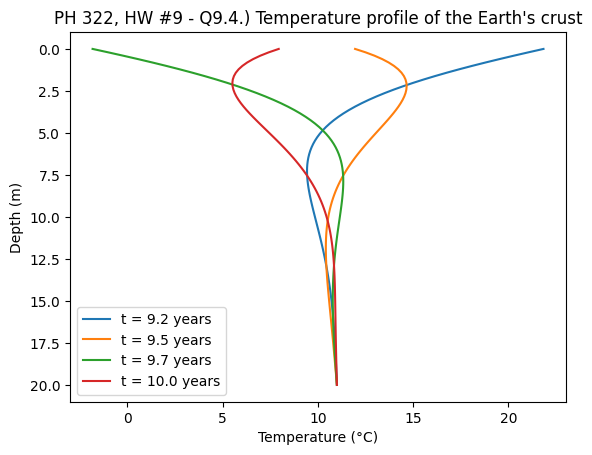

In [17]:
### PH322 - HW #9 - Q9.4. - Dan Jang
## Credits to ChatGPT for numpy & matplotlib implementation

import numpy as np
import matplotlib.pyplot as plt

# Parameters
tau = 365  # days
A = 10  # °C
B = 12  # °C
D = 0.1  # m^2/day
L = 20  # m
T_bottom = 11  # °C
total_years = 10
total_days = total_years * tau

# Grid points and time step
N = 100
h = 0.01


# Function for surface temperature
def T0(t):
    return A + B * np.sin(2 * np.pi * t / tau)


# Initialize temperature profile
T = np.full(N, 10, dtype=np.float64)
T[-1] = T_bottom

# FTCS method
for day in range(int(total_days / h)):
    t = day * h
    T[0] = T0(t)
    T[1:-1] += h * D * (T[2:] - 2 * T[1:-1] + T[:-2]) / (L / N)**2

    # Save temperature profiles at 3-month intervals for the tenth year
    if total_years - 1 <= t / tau < total_years:
        if t % (tau // 4) == 0:
            plt.plot(T, np.linspace(0, L, N), label=f"t = {t / tau:.1f} years")

# Plotting
plt.xlabel("Temperature (°C)")
plt.ylabel("Depth (m)")
plt.title("PH 322, HW #9 - Q9.4.) Temperature profile of the Earth's Crust")
plt.legend()
plt.gca().invert_yaxis()
plt.show()

**Total Exercise Pts /10**

## Total Pts /60